<a href="https://colab.research.google.com/github/ngotrithu/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Mục Đích:
* Với những thông tin đã cung cấp xây dựng mô hình dự báo liệu KH này có thực hiện hành vi gian lận khi sử dụng thẻ tín dụng hay không?
* Điều quan trọng của công ty tín dụng phát hành thẻ là phát hiện được các KH có hành vi gian lận thẻ tín dụng để khi họ mua các sản phẩm, dịch vụ họ sẽ không bị tính phí cho các sản phẩm, dịch vụ đấy
* Bộ dữ liệu này chứa các thông tin giao dịch có 492 TH gian lận trong tổng số 284.807 giao dịch. Đây là bộ dữ liệu mất cân bằng nghiêm trọng với positive class (gian lận) chiếm 0,172% tổng số giao dịch. Do đó, chúng ta không nên sử dụng metrics `Accuracy` để đánh giá mô hình vì số lượng nhãn 0 quá nhiều, thay vào đó, chúng ta nên tập trung vào F1 Score, Precision/Recall, ROC_AUC hoặc Confusion matrix để có sự đánh giá chính xác hơn về hiệu suất của các mô hình

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('drive/My Drive/Colab Notebooks')
!ls dataset

Mounted at /content/drive
creditcard.csv	    realestate.csv  weatherAUS_2.csv
Customer-Churn.csv  test.csv	    weatherAUS.csv
data		    train.csv	    weatherdata.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model, metrics
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

##Load Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('dataset/creditcard.csv')
# Converting all column names to lower case
df.columns = df.columns.str.lower()
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* Do vấn đề bảo mật, các features gốc V1, V2, ... V28 đã được biến đổi bằng PCA. Tuy nhiên, chúng tôi có thể đoán rằng các features này có thể là số thẻ tín dụng, ngày hết hạn, CVV, tên chủ thẻ, vị trí giao dịch, ngày giao dịch- thời gian,...
* Có hai features duy nhất chưa được chuyển đổi với PCA là `Time` và `Amount`. Do đó, chúng ta chỉ cần tập trung vào việc xử lý hai features này

##Exploratory Data Analysis

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    284807 non-null  float64
 1   v1      284807 non-null  float64
 2   v2      284807 non-null  float64
 3   v3      284807 non-null  float64
 4   v4      284807 non-null  float64
 5   v5      284807 non-null  float64
 6   v6      284807 non-null  float64
 7   v7      284807 non-null  float64
 8   v8      284807 non-null  float64
 9   v9      284807 non-null  float64
 10  v10     284807 non-null  float64
 11  v11     284807 non-null  float64
 12  v12     284807 non-null  float64
 13  v13     284807 non-null  float64
 14  v14     284807 non-null  float64
 15  v15     284807 non-null  float64
 16  v16     284807 non-null  float64
 17  v17     284807 non-null  float64
 18  v18     284807 non-null  float64
 19  v19     284807 non-null  float64
 20  v20     284807 non-null  float64
 21  v21     28

In [ ]:
df.isnull().sum().sum()

0

Bộ dữ liệu này có 29 biến `float`, 1 biến target là `int` và không có missing values

In [ ]:
df['class'].value_counts()/len(df)

0    0.998273
1    0.001727
Name: class, dtype: float64

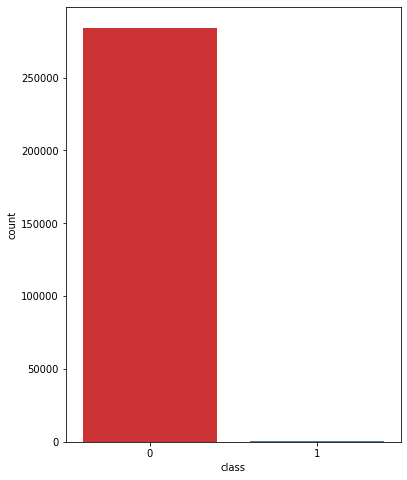

In [ ]:
f,ax = plt.subplots(figsize=(6,8))
ax = sns.countplot(x='class', data=df, palette='Set1')
plt.show()

* Bộ dữ liệu này chứa các thông tin giao dịch có 492 TH gian lận trong tổng số 284.807 giao dịch. Đây là bộ dữ liệu mất cân bằng nghiêm trọng với positive class (gian lận) chiếm 0,172% tổng số giao dịch

In [ ]:
df[['time','amount']].describe()

,time,amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


* Trung bình, mỗi giao dịch diễn ra sau mỗi 94813s
* Số tiền giao dịch TB là 88.34 với độ lệch chuẩn 250, số tiền giao dịch lớn nhất là 25691
* Dựa vào giá trị mean và max dễ dàng nhận thấy hai biến này có outliers

In [ ]:
fraud = df[df['class']==1]
normal = df[df['class']==0]
print(f'Shape of Fraud Transactions: {fraud.shape}')
print(f'Shape of Normal Transactions: {normal.shape}')

Shape of Fraud Transactions: (492, 31)
Shape of Normal Transactions: (284315, 31)


In [ ]:
pd.concat([fraud['amount'].describe(), normal['amount'].describe()], axis=1)

,amount,amount
count,492.000000,284315.000000
mean,122.211321,88.291022
std,256.683288,250.105092
min,0.000000,0.000000
25%,1.000000,5.650000
50%,9.250000,22.000000
75%,105.890000,77.050000
max,2125.870000,25691.160000


In [ ]:
fraud['amount'].value_counts().head()

1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
Name: amount, dtype: int64

* Với những giao dịch gian lận, số tiền bị gian lận TB là 122.22 USD, cao nhất là 2125 USD, thấp nhất là 0 và số tiền bị nhiều nhất là 1USD với 113 lần.


###Distribution of Time

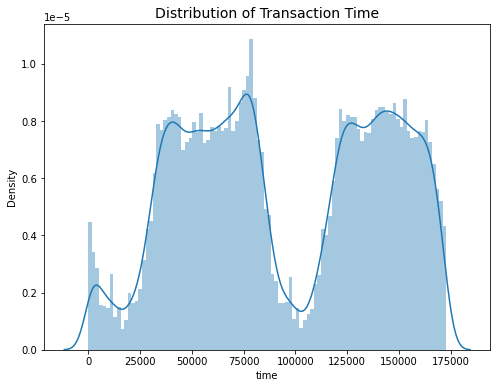

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Time', fontsize=14)
sns.distplot(df['time'], bins=100)
plt.show()

* Bộ dữ liệu này chứa thông tin giao dịch trong hai ngày, nhìn vào biểu đồ phân phối ta thấy có hai đỉnh và hai đáy. Khả năng cao hai đỉnh là các giao dịch vào ban ngày vì có số lượng giao dịch nhiều, còn ở hai đáy là các giao dịch vào ban đêm lúc đó mọi người đã đi ngủ

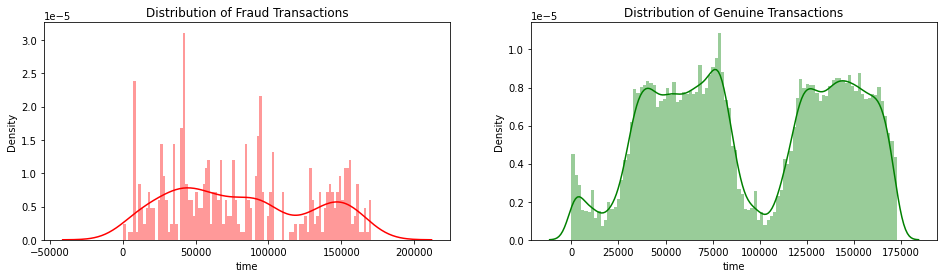

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(16,4))

sns.distplot(fraud['time'], bins=100, color='red', ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(normal['time'], bins=100, color='green', ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

###Distribution of Amount

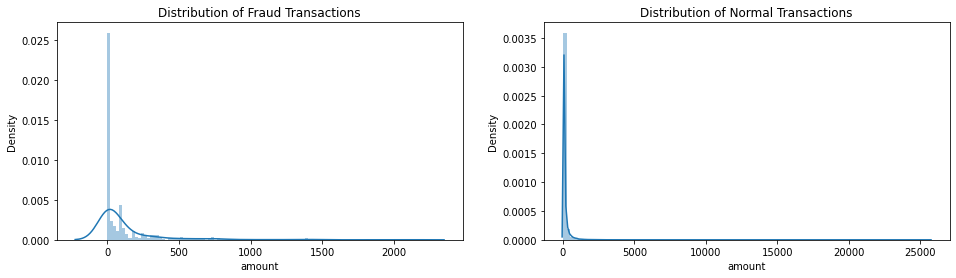

In [ ]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(fraud['amount'], bins=100, ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(normal['amount'], bins=100, ax=axs[1])
axs[1].set_title("Distribution of Normal Transactions")

plt.show()

In [ ]:
# Scale amount by log
# Cộng thêm một đại lượng nhỏ 0.0001 để giá trị log gần 0 dương vô cùng
df['amount_log'] = np.log(df.amount + 0.0001)

Phép biến đổi Log rất hữu ích khi được áp dụng cho các phân phối lệch vì chúng có xu hướng mở rộng các giá trị nằm trong phạm vi cường độ thấp hơn và có xu hướng nén hoặc giảm các giá trị nằm trong phạm vi cường độ cao hơn

In [ ]:
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v22,v23,v24,v25,v26,v27,v28,amount,class,amount_log
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,5.008099
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.989578
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.936639
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.816242
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.248354


##Spliting the data

In [ ]:
X = df.drop(['class','time'], axis=1)

y = df['class']

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape

((227845, 30), (56962, 30))

##Scaling the data

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

##SMOTE

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
print('Original dataset shape %s' % Counter(y_train))

smt = SMOTE(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_smt))

Original dataset shape Counter({0: 227454, 1: 391})
Resampled dataset shape Counter({0: 227454, 1: 227454})


##Modeling

In [ ]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    #print("Precision  = {}".format(precision))
    #print("Recall  = {}".format(recall))
    print("F1 Score  = {}".format(f1))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues)
    
    return model, accuracy, roc_auc, f1, coh_kap, time_taken

###Logistic Regression

Accuracy = 0.9757733225659211
ROC Area under Curve = 0.958214934769712
F1 Score  = 0.12101910828025476
Cohen's Kappa = 0.1180928601987834
Time taken = 44.858938694000244
              precision    recall  f1-score   support

           0    0.99989   0.97584   0.98772     56861
           1    0.06467   0.94059   0.12102       101

    accuracy                        0.97577     56962
   macro avg    0.53228   0.95821   0.55437     56962
weighted avg    0.99823   0.97577   0.98618     56962



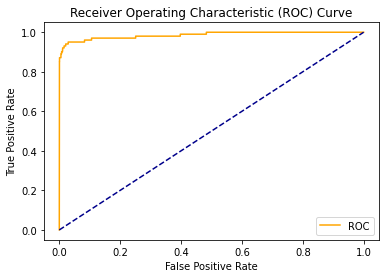

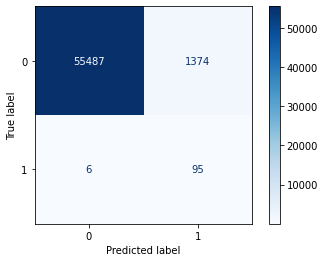

In [ ]:
# Logistic Regression with SMOTE
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lrsmt = LogisticRegression(**params_lr)
model_lrsmt, accuracy_lrsmt, roc_auc_lrsmt,f1_score_lrsmt,coh_kap_lrsmt, tt_lrsmt = run_model(model_lrsmt, X_train_smt, y_train_smt, X_test, y_test)

###Decision Tree

Accuracy = 0.9939608862048384
ROC Area under Curve = 0.908024449408589
F1 Score  = 0.3254901960784314
Cohen's Kappa = 0.32356646481866436
Time taken = 6.7982823848724365
              precision    recall  f1-score   support

           0    0.99968   0.99427   0.99697     56861
           1    0.20293   0.82178   0.32549       101

    accuracy                        0.99396     56962
   macro avg    0.60131   0.90802   0.66123     56962
weighted avg    0.99827   0.99396   0.99578     56962



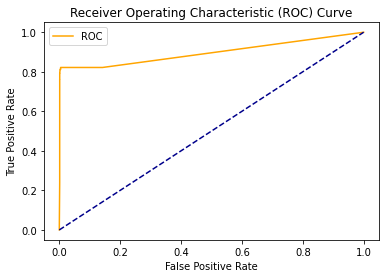

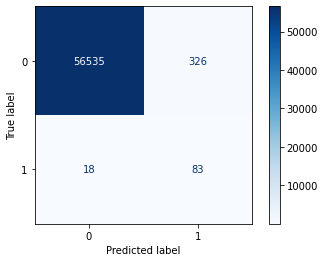

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dtsmt = DecisionTreeClassifier(**params_dt)
model_dtsmt, accuracy_dtsmt, roc_auc_dtsmt, f1_score_dtsmt,coh_kap_dtsmt, tt_dtsmt = run_model(model_dtsmt, X_train_smt, y_train_smt, X_test, y_test)

###Random Forest

Accuracy = 0.9994908886626171
ROC Area under Curve = 0.9256194670310315
F1 Score  = 0.8557213930348259
Cohen's Kappa = 0.8554663937741017
Time taken = 504.0955595970154
              precision    recall  f1-score   support

           0    0.99974   0.99975   0.99974     56861
           1    0.86000   0.85149   0.85572       101

    accuracy                        0.99949     56962
   macro avg    0.92987   0.92562   0.92773     56962
weighted avg    0.99949   0.99949   0.99949     56962



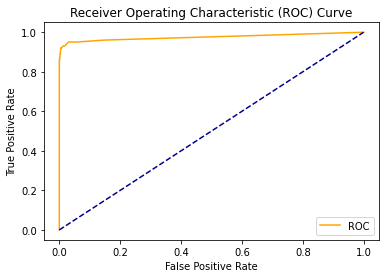

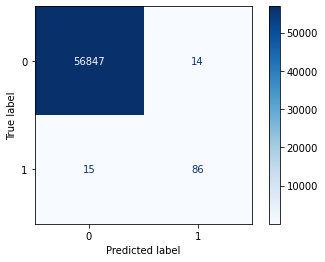

In [ ]:
# Random Forest with SMOTE
from sklearn.ensemble import RandomForestClassifier

model_rfsmt = RandomForestClassifier()
model_rfsmt, accuracy_rfsmt, roc_auc_rfsmt, f1_score_rfsmt,coh_kap_rfsmt, tt_rfsmt = run_model(model_rfsmt, X_train_smt, y_train_smt, X_test, y_test)

###LightGBM

Accuracy = 0.9985077771145676
ROC Area under Curve = 0.8954768280683083
F1 Score  = 0.6530612244897959
Cohen's Kappa = 0.6523365857658603
Time taken = 11.434115648269653
              precision    recall  f1-score   support

           0    0.99963   0.99887   0.99925     56861
           1    0.55556   0.79208   0.65306       101

    accuracy                        0.99851     56962
   macro avg    0.77759   0.89548   0.82616     56962
weighted avg    0.99884   0.99851   0.99864     56962



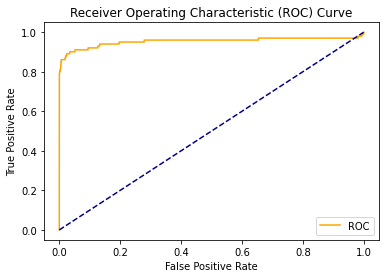

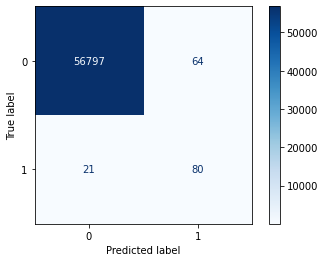

In [ ]:
# Light GBM with SMOTE
import lightgbm as lgb

model_lgbsmt = lgb.LGBMClassifier()
model_lgbsmt, accuracy_lgbsmt, roc_auc_lgbsmt, f1_score_lgbsmt,coh_kap_lgbsmt, tt_lgbsmt = run_model(model_lgbsmt, X_train_smt, y_train_smt, X_test, y_test)

###Catboost

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 49 kB/s 


Learning rate set to 0.5
0:	learn: 0.0938983	total: 21.7s	remaining: 6m 52s
1:	learn: 0.0369055	total: 41.3s	remaining: 6m 11s
2:	learn: 0.0199682	total: 54.2s	remaining: 5m 6s
3:	learn: 0.0125474	total: 1m 5s	remaining: 4m 21s
4:	learn: 0.0086884	total: 1m 16s	remaining: 3m 49s
5:	learn: 0.0059906	total: 1m 27s	remaining: 3m 24s
6:	learn: 0.0042264	total: 1m 38s	remaining: 3m 3s
7:	learn: 0.0034404	total: 1m 49s	remaining: 2m 44s
8:	learn: 0.0028327	total: 2m	remaining: 2m 27s
9:	learn: 0.0023884	total: 2m 12s	remaining: 2m 12s
10:	learn: 0.0021406	total: 2m 23s	remaining: 1m 57s
11:	learn: 0.0018043	total: 2m 35s	remaining: 1m 43s
12:	learn: 0.0015753	total: 2m 46s	remaining: 1m 29s
13:	learn: 0.0012858	total: 2m 58s	remaining: 1m 16s
14:	learn: 0.0011692	total: 3m 9s	remaining: 1m 3s
15:	learn: 0.0010273	total: 3m 20s	remaining: 50s
16:	learn: 0.0009326	total: 3m 31s	remaining: 37.3s
17:	learn: 0.0008498	total: 3m 42s	remaining: 24.7s
18:	learn: 0.0007541	total: 3m 53s	remaining: 12

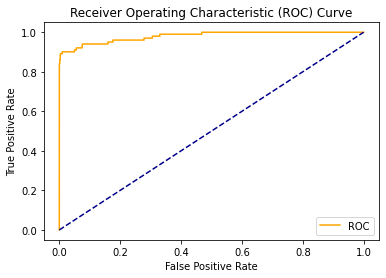

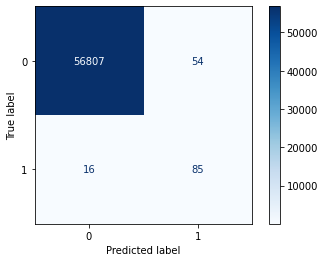

In [ ]:
# Catboost
import catboost as cb
params_cb ={'iterations': 20,
            'max_depth': 16}

model_cbsmt = cb.CatBoostClassifier(**params_cb)
model_cbsmt, accuracy_cbsmt, roc_auc_cbsmt, f1_score_cbsmt,coh_kap_cbsmt, tt_cbsmt = run_model(model_cbsmt, X_train_smt, y_train_smt, X_test, y_test)

###XGBoost

Accuracy = 0.9984199992977775
ROC Area under Curve = 0.9102579662303122
F1 Score  = 0.6484375
Cohen's Kappa = 0.6476810261754515
Time taken = 216.34099793434143
              precision    recall  f1-score   support

           0    0.99968   0.99873   0.99921     56861
           1    0.53548   0.82178   0.64844       101

    accuracy                        0.99842     56962
   macro avg    0.76758   0.91026   0.82382     56962
weighted avg    0.99886   0.99842   0.99859     56962



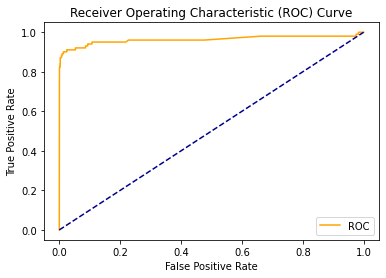

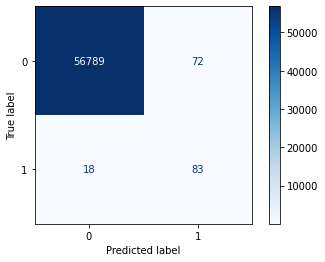

In [ ]:
# XGBoost with SMOTE
import xgboost as xgb
params_xgb ={'n_estimators': 20,
            'max_depth': 16}

model_xgbsmt = xgb.XGBClassifier(**params_xgb)
model_xgbsmt, accuracy_xgbsmt, roc_auc_xgbsmt, f1_score_xgbsmt,coh_kap_xgbsmt, tt_xgbsmt = run_model(model_xgbsmt, X_train_smt, y_train_smt, X_test, y_test)

###AdaBoost

Accuracy = 0.9898704399424177
ROC Area under Curve = 0.9208006984550303
F1 Score  = 0.2296395193591455
Cohen's Kappa = 0.22726875822202108
Time taken = 367.2711269855499
              precision    recall  f1-score   support

           0    0.99973   0.99012   0.99490     56861
           1    0.13272   0.85149   0.22964       101

    accuracy                        0.98987     56962
   macro avg    0.56622   0.92080   0.61227     56962
weighted avg    0.99820   0.98987   0.99354     56962



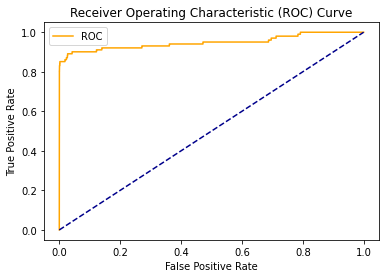

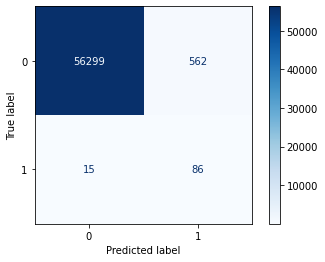

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_adasmt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                                  n_estimators=50,
                                  algorithm="SAMME.R",
                                  learning_rate=0.5)
model_adasmt, accuracy_adasmt, roc_auc_adasmt, f1_score_adasmt,coh_kap_adasmt, tt_adasmt = run_model(model_adasmt, X_train_smt, y_train_smt, X_test, y_test)

##Model Selection

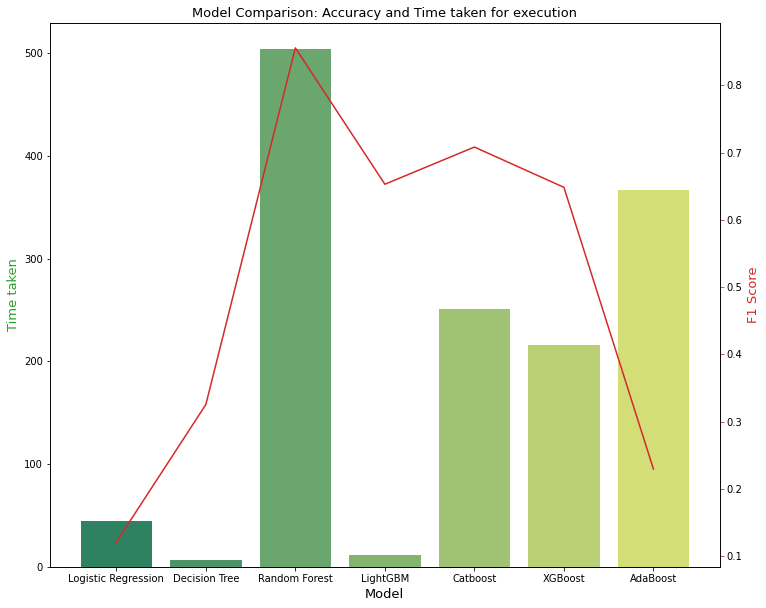

In [ ]:
accuracy_scores = [accuracy_lrsmt, accuracy_dtsmt, accuracy_rfsmt, accuracy_lgbsmt, accuracy_cbsmt, accuracy_xgbsmt, accuracy_adasmt]
roc_auc_scores = [roc_auc_lrsmt, roc_auc_dtsmt, roc_auc_rfsmt, roc_auc_lgbsmt, roc_auc_cbsmt, roc_auc_xgbsmt, roc_auc_adasmt]
f1_scores = [f1_score_lrsmt, f1_score_dtsmt, f1_score_rfsmt, f1_score_lgbsmt, f1_score_cbsmt, f1_score_xgbsmt, f1_score_adasmt]
coh_kap_scores = [coh_kap_lrsmt, coh_kap_dtsmt,coh_kap_rfsmt, coh_kap_lgbsmt, coh_kap_cbsmt, coh_kap_xgbsmt, coh_kap_adasmt]
tt = [tt_lrsmt, tt_dtsmt, tt_rfsmt, tt_lgbsmt, tt_cbsmt, tt_xgbsmt, tt_adasmt]

model_data = {'Model': ['Logistic Regression','Decision Tree','Random Forest','LightGBM','Catboost','XGBoost', 'AdaBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'F1 Score': f1_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('F1 Score', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='F1 Score', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

Mô hình Random Forest cho kết quả `f1_score` tốt nhất nhưng thời gian huấn luyện lâu và tốn chi phí tính toán nên để tối ưu chúng ta sẽ lựa chọn mô hình `LightGBM` để fine-tuning

##Fine Tuning

In [ ]:
!pip install --quiet optuna

     |████████████████████████████████| 308 kB 4.4 MB/s 
     |████████████████████████████████| 81 kB 6.4 MB/s 
     |████████████████████████████████| 210 kB 44.3 MB/s 
     |████████████████████████████████| 78 kB 3.5 MB/s 
     |████████████████████████████████| 150 kB 40.6 MB/s 
     |████████████████████████████████| 49 kB 4.1 MB/s 
     |████████████████████████████████| 113 kB 11.5 MB/s 


In [ ]:
import optuna  # pip install optuna
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

def objective(trial, X_train_smt, y_train_smt):
    max_depth=trial.suggest_int('max_depth',2,14)
    param_grid = {
        #         "device_type": trial.suggest_categorical("device_type", ['gpu']),
        #"n_estimators": trial.suggest_categorical("n_estimators", 1,300 ),
        "learning_rate": trial.suggest_float("learning_rate", 0.0001, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 4, 2**max_depth),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 5, 500),
        "max_bin": trial.suggest_int("max_bin", 10, 300),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.95, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.2, 0.95, step=0.1)
    }
    #scoring = {'accuracy' : make_scorer(accuracy_score), 
    #      'precision' : make_scorer(precision_score),
    #     'recall' : make_scorer(recall_score), 
    #    'f1_score' : make_scorer(f1_score)}

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    model = lgb.LGBMClassifier(**param_grid)
    model.fit(X_train_smt,y_train_smt)
    scores = cross_val_score(model, X_train_smt, y_train_smt,
                             scoring=make_scorer(f1_score, average='weighted', labels=[1]),cv=cv, n_jobs=-1)
    return np.mean(scores)

In [ ]:
study = optuna.create_study(direction='maximize')
func = lambda trial: objective(trial, X_train_smt, y_train_smt)
study.optimize(func, n_trials=100)

[I 2022-03-22 08:33:46,733] A new study created in memory with name: no-name-5ded3fe7-8239-4ca3-abec-c8216b053643
[I 2022-03-22 08:34:27,587] Trial 0 finished with value: 0.9815314594640159 and parameters: {'max_depth': 10, 'learning_rate': 0.02723835313433818, 'num_leaves': 761, 'min_data_in_leaf': 310, 'max_bin': 244, 'lambda_l1': 0, 'lambda_l2': 60, 'min_gain_to_split': 2.921029204099039, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 0 with value: 0.9815314594640159.
[I 2022-03-22 08:35:05,420] Trial 1 finished with value: 0.992956712745864 and parameters: {'max_depth': 4, 'learning_rate': 0.08886077681528277, 'num_leaves': 14, 'min_data_in_leaf': 244, 'max_bin': 217, 'lambda_l1': 95, 'lambda_l2': 90, 'min_gain_to_split': 5.230510021315511, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 1 with value: 0.992956712745864.
[I 2022-03-22 08:35:36,250] Trial 2 finished with value: 0.9969317500546548 and parameters:

In [ ]:
#trial = study.best_trial
#print('Accuracy: {}'.format(trial.value))
#print("Best hyperparameters: {}".format(trial.params))

print(f"\tBest value (Accuracy): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

	Best value (Accuracy): 0.99977
	Best params:
		max_depth: 13
		learning_rate: 0.22690320686746146
		num_leaves: 501
		min_data_in_leaf: 168
		max_bin: 61
		lambda_l1: 0
		lambda_l2: 0
		min_gain_to_split: 1.2780588498979437
		bagging_fraction: 0.9
		bagging_freq: 1
		feature_fraction: 0.2


Accuracy = 0.9992977774656788
ROC Area under Curve = 0.9255227399245789
F1 Score  = 0.8113207547169811
Cohen's Kappa = 0.8109697729841949
Time taken = 5.972809314727783
              precision    recall  f1-score   support

           0    0.99974   0.99956   0.99965     56861
           1    0.77477   0.85149   0.81132       101

    accuracy                        0.99930     56962
   macro avg    0.88726   0.92552   0.90548     56962
weighted avg    0.99934   0.99930   0.99931     56962



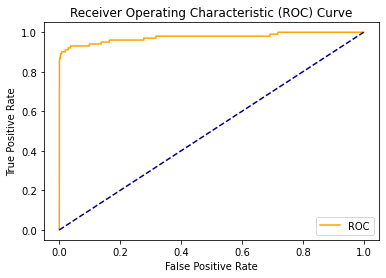

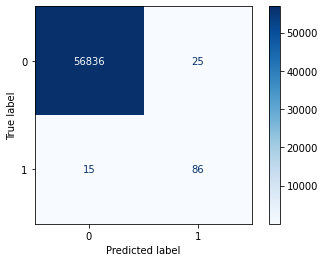

In [ ]:
param_lgb = {'max_depth': 13,
		'learning_rate': 0.22690320686746146,
		'num_leaves': 501,
		'min_data_in_leaf': 168,
		'max_bin': 61,
		'lambda_l1': 0,
		'lambda_l2': 0,
		'min_gain_to_split': 1.2780588498979437,
		'bagging_fraction': 0.9,
		'bagging_freq': 1,
		'feature_fraction': 0.2
    
}

lgb_opt = lgb.LGBMClassifier(**param_lgb)
lgb_opt, accuracy_lgbopt, roc_auc_lgbopt, f1_score_lgbopt,coh_kap_lgbopt, tt_lgbopt = run_model(lgb_opt, X_train_smt, y_train_smt, X_test, y_test)

* Mô hình đã có sự cải thiện đáng kể với chỉ số `f1_score` từ 65.3% đã tăng lên 81.13%
* Với bài toán Credit Card Fraud Detection, chúng ta nên chú trọng vào việc giảm số lượng sai lầm loại I (FP) mà mô hình phán đoán được. Những khách hàng thuộc sai lầm loại I về thực tế họ đã thực hiện hành vi gian lận nhưng mô hình dự đoán những khách hàng này không có hành vi gian lận. Điều dẫn đến một sự mất mát lớn cho tổ chức tín dụng khi chúng ta đã dự đoán sai những đối tượng KH này.
* Do đó, ngoài việc lựa chọn mô hình tốt, chúng ta cũng cần lựa chọn những mô hình có các TH thuộc sai lầm loại I là thấp nhất.

=> Mô hình `LightGBM` sẽ là mô hình được lựa chọn đề giải quyết bài toán này!